# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
#mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

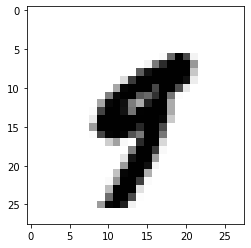

In [6]:
# plot single row
import matplotlib.pyplot as plt

reshaped = X.iloc[36000].values.reshape(28, 28)
plt.imshow(reshaped, cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [7]:
# X is an image of y value
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for testing.

In [8]:
# train-test split by index
X_train = X.iloc[:60000]
X_test = X.iloc[60000:]
y_train = y.iloc[:60000]
y_test = y.iloc[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [60]:
# locate rows with output 5
np.where(y=='5')
y[y=='5']

0        5
11       5
35       5
47       5
65       5
        ..
69941    5
69970    5
69982    5
69988    5
69998    5
Name: class, Length: 6313, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [73]:
# assign new train-test y for 5
y_train_5 = np.where(y_train=='5', 1, 0)
y_test_5 = np.where(y_test=='5',1, 0)

print(X_train.shape, y_train_5.shape, X_test.shape, y_test_5.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_5)

lr.score(X_test, y_test_5)

C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9779

*The accuracy score is almost 100%.*

### Does the classifier predict correctly the 36000th digit we picked before?

In [86]:
# assign a variable to X with index 36000
nine = X.iloc[36000]

In [89]:
# predict nine with my just5s model
lr.predict(nine.values.reshape(1, -1))

C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

*The value predicted is 0 so it is right: nine does not output 5.*

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [98]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [109]:
never_5_clf.fit(X_train, y_train_5)
never_5 = never_5_clf.predict(X_test)

In [110]:
# return prediction frequencies: always False
np.unique(never_5, return_counts=True)

(array([False]), array([10000], dtype=int64))

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [111]:
# compare metrics of both models
from sklearn import metrics

print("Metrics for y_pred_5: ")
print(metrics.confusion_matrix(y_test_5, y_pred_5))
print(metrics.precision_score(y_test_5, y_pred_5))
print(metrics.recall_score(y_test_5, y_pred_5))
print(metrics.f1_score(y_test_5, y_pred_5))

Metrics for y_pred_5: 
[[9034   74]
 [ 147  745]]
0.9096459096459096
0.8352017937219731
0.8708357685563999


In [112]:
from sklearn import metrics

print("Metrics for never_5: ")
print(metrics.confusion_matrix(y_test_5, never_5))
print(metrics.precision_score(y_test_5, never_5))
print(metrics.recall_score(y_test_5, never_5))
print(metrics.f1_score(y_test_5, never_5))

Metrics for never_5: 
[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*I have an overall high accuracy score but this is induced by the proportion of y not equal to 5 (90%) compared to the proportion of y equal to 5 (10%). This is visible in the confusion matrix and the other scores actually help to cross-validate this conclusion.*

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

*Without knowing the model, the dumb classifier metrics could be interpreted as the results of a better fit. We can deduce from this that any model metrics should be considered with regards to the model used and that together they provide even more accurate information.*

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

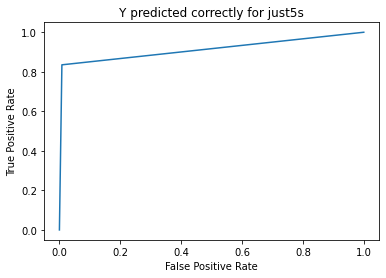

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_5, y_pred_5)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title('Y predicted correctly for just5s')
plt.show()

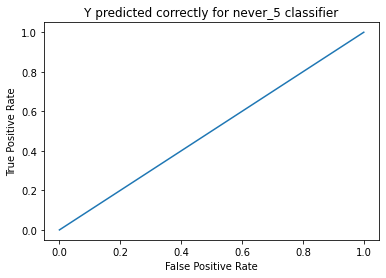

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_5, never_5)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title('Y predicted correctly for never_5 classifier')
plt.show()

### Now find the roc_auc_score for each. 

In [117]:
print(metrics.roc_auc_score(y_test_5, y_pred_5))
print(metrics.roc_auc_score(y_test_5, never_5))

0.9135385341029717
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

*The roc_auc score actually weighs the accuracy score with precision and recall: t